# Label Propagation

## Label propagation is similar to training a classification model and then using that model to make predictions on test data. The key difference is that in general, our analogue to the test data has no labels against which to evaluate our model. In this exercise, we keep the entire set of true labels for illustrative purposes, but the vast marjority of them play no role in training the model. 

## This exercise is adapted from scikit-learn's [tutorial](https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html) on zero shot learning .

### Load the necessary modules and functions

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

from sklearn.metrics import confusion_matrix, classification_report

### Exercise: Load and preprocess the data. 
1. Shuffle the indices
2. Use the shuffled indices to extract 1000 random samples from the features data
3. Extract the corresponding 1000 labels and images
4. Copy the labels. Treat the first 50 shuffled samples as labeled data and the rest as unlabeled data. Replace the labels after the first 50 with -1.

We'll use this copy of our labels (with 50 labels known and the other 950 hidden) to train our model, and use the original copy (with all 1000 labels known) to evaluate the model.

In [52]:
# Load the digits dataset
# digits = {data,target,indices}; n = 1797
digits = datasets.load_digits()

# Set the random state to 2 for reproducibility
rng = np.random.RandomState(2)

### START CODE HERE ###
# Initialize the indices as an ordered array, with each element corresponding to a sample in the dataset
indices = np.arange(len(digits.data))

# Shuffle the indices
rng.shuffle(indices)

# Use the shuffled indices to extract 1000 feature vectors, labels, and images
n_total_samples = len(digits.data)
# Features
X = digits.data[indices]
# Labels
y = digits.target[indices]
# Images
images =digits.images[indices] 

# Copy the labels
y_train = np.copy(y)

# Replace all of the elements of y_train after the first 50 with -1, rendering them unlabeled
n_labeled_points = 10
# Create an ordered array of indices of the training data
train_indices = np.arange(0, n_total_samples)
# Define the training data indices after n_labeled_points as unlabeled
unlabeled_set =  train_indices[n_labeled_points:]
# Conduct the label replacement
y_train[unlabeled_set] = -1
### END CODE HERE ###

### Verify that the labels are randomly distributed and all the labels after the first 50 in `y_train` are hidden

### Exercise: Train the label propagation model with `gamma = 0.25` and `max_iter = 20`

### Make sure you pass in the correct version of the target array, i.e. the one containing unlabeled data

In [54]:
### START CODE HERE ###
# Initialize the model
lp_model = LabelSpreading(gamma=.25, max_iter=20)
# Train the model
lp_model.fit(X, y_train)
### END CODE HERE ###

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

### Exercise: Evaluate the model's performance on the unlabeled data

In [55]:
### START CODE HERE ###
# Extract the label predictions for the unlabeled data
predicted_labels = lp_model.transduction_[unlabeled_set]
# Extract the true labels of the unlabeled data
true_labels = y[unlabeled_set]
# Compute the confusion matrix between the true and predicted labels of the unlabeled data
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)
### END CODE HERE ###
print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

Label Spreading model: 10 labeled & 1787 unlabeled points (1797 total)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       177
           1       0.33      0.93      0.49       179
           2       0.00      0.00      0.00       177
           3       0.00      0.00      0.00       183
           4       0.90      0.98      0.94       179
           5       0.94      0.93      0.94       181
           6       0.95      0.96      0.95       180
           7       0.93      0.98      0.96       178
           8       0.00      0.00      0.00       174
           9       0.41      0.81      0.54       179

    accuracy                           0.66      1787
   macro avg       0.54      0.66      0.58      1787
weighted avg       0.54      0.66      0.58      1787

Confusion matrix
[[177   0   0   0   0   0   0]
 [  0 166   3   0   9   0   1]
 [  0   0 175   1   0   3   0]
 [  0   0   4 169   1   0   7]
 [  3   3   0   2 172   0   0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Exercise: Find the 10 most uncertain labels in descending order of uncertainty, i.e. the labels for which the model made the least confident predictions. Plot the associated images. Observe any discrepancies between predicted and true labels. Do you see any patterns? What might account for them? 

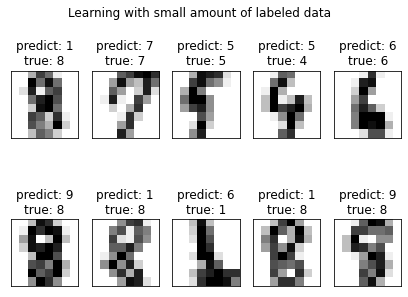

In [56]:
### START CODE HERE ###
# Calculate uncertainty values for each transduced distribution
# You may scipy stats' entropy() function useful.
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

# Pick the top 10 most uncertain labels, in descending order of uncertainty
uncertainty_index = np.argsort(pred_entropies)[-10:]

### END CODE HERE ###

# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()

### Exercise: Repeat the experiment with 10, 100, and 250 labeled images. How do the differing numbers of labeled samples affect the model's performance? Which number detections yield the most errors?



In [57]:
# The model performs better as the number of labeled images increases with the worst performing model for 10 labeled images. 